In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
# For better visuals
%matplotlib inline
sns.set(style="whitegrid")

In [ ]:
csv = r'/content/personality_dataset.csv'

df = pd.read_csv(csv)

In [ ]:

#Filling null values
df['Stage_fear'] = df['Stage_fear'].fillna('Unknown')
df['Drained_after_socializing'] = df['Drained_after_socializing'].fillna('Unknown')


df['Time_spent_Alone'] = df['Time_spent_Alone'].fillna(df['Time_spent_Alone'].mean()).astype(int)
df['Social_event_attendance'] = df['Social_event_attendance'].fillna(df['Social_event_attendance'].mean()).astype(int)
df['Going_outside'] = df['Going_outside'].fillna(df['Going_outside'].mean()).astype(int)
df['Friends_circle_size'] = df['Friends_circle_size'].fillna(df['Friends_circle_size'].mean()).astype(int)
df['Post_frequency'] = df['Post_frequency'].fillna(df['Post_frequency'].mean()).astype(int)

In [ ]:
#Dropping duplicates
df = df.dropna()

In [ ]:
# Encode categorical features
le_stage_fear = LabelEncoder()
le_drained = LabelEncoder()
le_personality = LabelEncoder()
df["Stage_fear"] = le_stage_fear.fit_transform(df["Stage_fear"])
df["Drained_after_socializing"] = le_drained.fit_transform(df["Drained_after_socializing"])
df["Personality"] = le_personality.fit_transform(df["Personality"])  # 0 = Extrovert, 1 = Introvert
df.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4,0,4,6,0,13,5,0
1,9,2,0,0,2,0,3,1
2,9,2,1,2,2,5,2,1
3,0,0,6,7,0,14,8,0
4,3,0,9,4,0,8,5,0


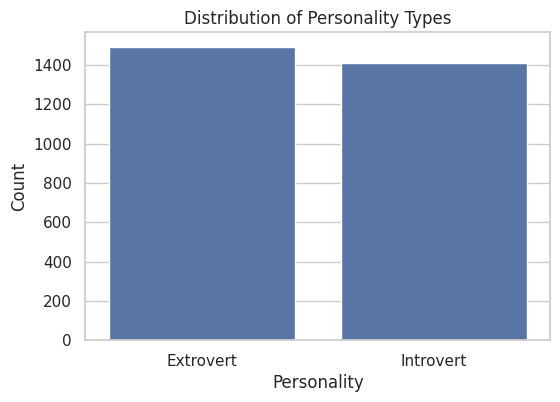

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x="Personality", data=df)
plt.title("Distribution of Personality Types")
plt.xticks([0,1], le_personality.inverse_transform([0,1]))
plt.xlabel("Personality")
plt.ylabel("Count")
plt.show()

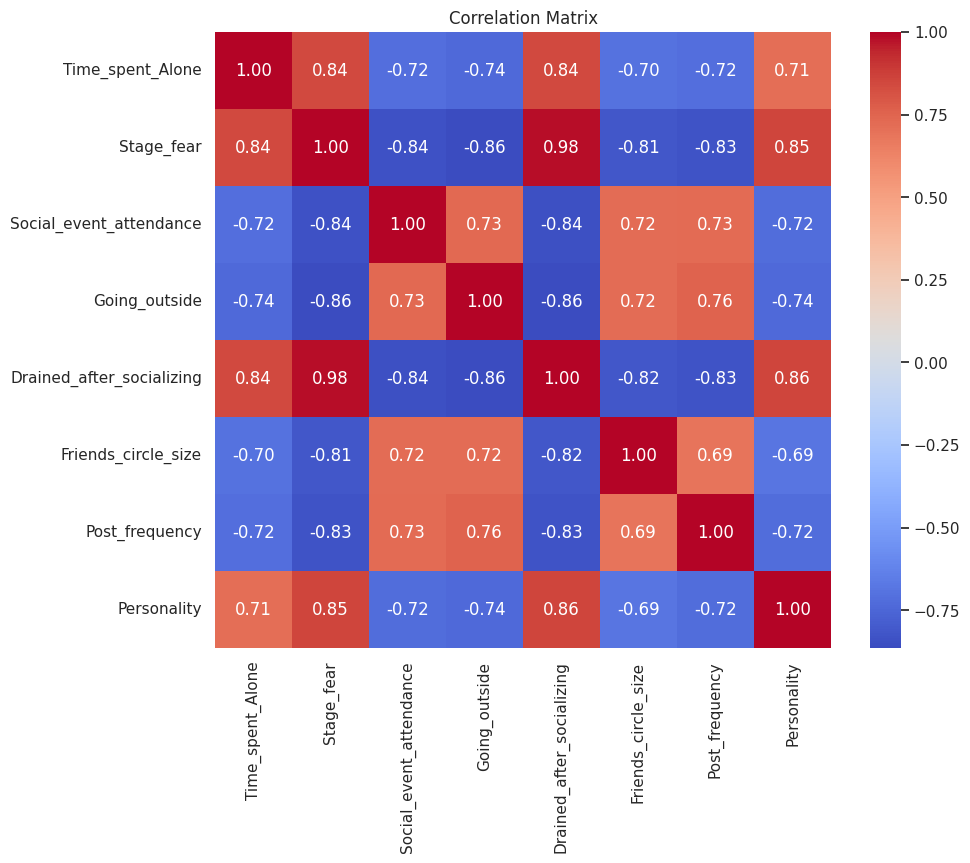

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", square=True)
plt.title("Correlation Matrix")
plt.show()

In [ ]:
X = df.drop("Personality", axis=1)
y = df["Personality"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
models = {
   "Logistic Regression": LogisticRegression(max_iter=1000),
   "Decision Tree": DecisionTreeClassifier(),
   "Random Forest": RandomForestClassifier(),
   "Gradient Boosting": GradientBoostingClassifier(),
   "KNN": KNeighborsClassifier(),
   "SVM": SVC()
}
accuracies = {}
best_model = None
best_score = 0
for name, model in models.items():
   model.fit(X_train, y_train)
   preds = model.predict(X_test)
   acc = accuracy_score(y_test, preds)
   accuracies[name] = acc
   print(f"\n=== {name} ===")
   print(f"Accuracy: {acc:.4f}")
   print(classification_report(y_test, preds, target_names=le_personality.classes_))
   if acc > best_score:
       best_score = acc
       best_model = model


=== Logistic Regression ===
Accuracy: 0.9293
              precision    recall  f1-score   support

   Extrovert       0.94      0.92      0.93       302
   Introvert       0.92      0.94      0.93       278

    accuracy                           0.93       580
   macro avg       0.93      0.93      0.93       580
weighted avg       0.93      0.93      0.93       580


=== Decision Tree ===
Accuracy: 0.8724
              precision    recall  f1-score   support

   Extrovert       0.89      0.87      0.88       302
   Introvert       0.86      0.88      0.87       278

    accuracy                           0.87       580
   macro avg       0.87      0.87      0.87       580
weighted avg       0.87      0.87      0.87       580


=== Random Forest ===
Accuracy: 0.9172
              precision    recall  f1-score   support

   Extrovert       0.93      0.91      0.92       302
   Introvert       0.91      0.92      0.91       278

    accuracy                           0.92       580
  

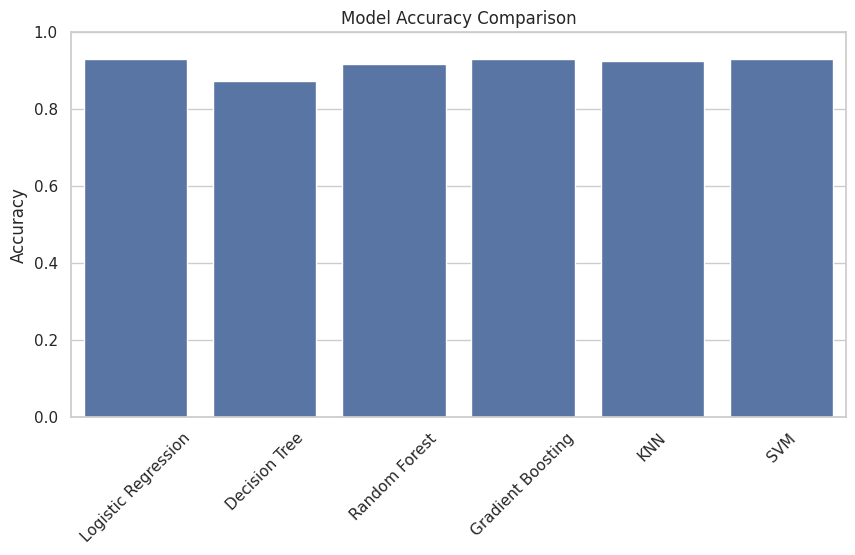

In [ ]:
plt.figure(figsize=(10, 5))
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()))
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.show()

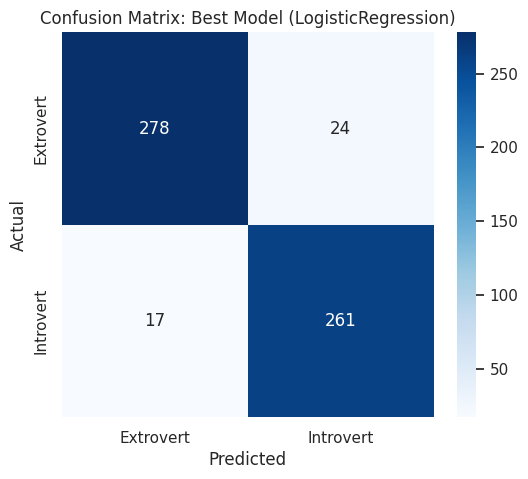

In [ ]:
best_preds = best_model.predict(X_test)
cm = confusion_matrix(y_test, best_preds)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
           xticklabels=le_personality.classes_,
           yticklabels=le_personality.classes_)
plt.title(f"Confusion Matrix: Best Model ({type(best_model).__name__})")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()